In [121]:
from sympy.interactive.printing import init_printing
init_printing(wrap_line=False, order="none")
from sympy.matrices import Matrix
from sympy import symbols, Wild



The day-24 (part 2) problem effectively gives us many equations of motion for particles, and we are told that there is an additional equation of motion, that of the rock, which intersects all of them.

If $\mathbf{h}_n$ is a hailstone, and it's initial position is $\mathbf{p}_n$ and it's velocity is $\mathbf{v}_n$, then we know that it's position at any point in time is:

\begin{equation}
\mathbf{h}_n = \mathbf{p}_n + \mathbf{v}_nt
\end{equation}


In [122]:
p_nx, p_ny, p_nz = symbols("p_nx p_ny p_nz")
p_n = Matrix(1, 3, [p_nx, p_ny, p_nz])

v_nx, v_ny, v_nz = symbols("v_nx v_ny v_nz")
v_n = Matrix(1, 3, [v_nx, v_ny, v_nz])


The collisions between the rock and the hailstones, that is the intersections between the equations of motion, do not all occur at the same time. So let's say that the collision between $\mathbf{h}_n$ and the rock occurs at $\mathbf{t}_n$:

\begin{equation}
\mathbf{h}_n = \mathbf{p}_n + \mathbf{v}_nt_n
\end{equation}

Let's also set up equations of motion for our rock  $\mathbf{r}$, with initial position $\mathbf{q}$ and velocity of $\mathbf{w}$:

\begin{equation}
\mathbf{r} = \mathbf{q} + \mathbf{w}t_n
\end{equation}



In [123]:
q_x, q_y, q_z = symbols("q_x q_y q_z")
q = Matrix(1, 3, [q_x, q_y, q_z])

w_x, w_y, w_z = symbols("w_x w_y w_z")
w = Matrix(1, 3, [w_x, w_y, w_z])

We know that at the point of collision the hailstone and rock are in the same place, so $\mathbf{r} = \mathbf{h}_n$. This gives us:

\begin{align}
\mathbf{p}_n + \mathbf{v}_n t_n &= \mathbf{q} + \mathbf{w}t_n \\
\implies \mathbf{p_n} - \mathbf{q} &= t_n\left(\mathbf{w} - \mathbf{v}_n \right)
\end{align}

This shows that $\mathbf{p_n} - \mathbf{q}$ is a scalar multiple of $\mathbf{w} - \mathbf{v}_n$. They must, therefore, be parallel and as a result their cross product must be zero:

\begin{equation}
(\mathbf{p_n} - \mathbf{q}) \times (\mathbf{w} - \mathbf{v}_n) = 0
\end{equation}

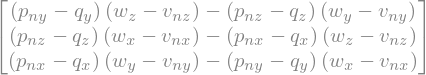

In [124]:
cross_product_n = (p_n - q).cross(w - v_n)
cross_product_n.T

Resolving the components of this cross product reveal three non-linear equations: 

\begin{align}

\begin{pmatrix}
    p_{nx} - q_x \\
    p_{ny} - q_y \\
    p_{nz} - q_z 
\end{pmatrix} \times
\begin{pmatrix}
    w_x - v_{nx} \\
    w_y - v_{ny} \\
    w_z - v_{nz} 
\end{pmatrix}  = 0
\end{align}

\begin{align}
(p_{ny} - q_y)(w_z - v_{nz}) - (p_{nz} - q_z)(w_y - v_{ny} ) &= 0 \\
(p_{nx} - q_x)(w_z - v_{nz}) - (p_{nz} - q_z)(w_x - v_{nx} ) &= 0\\
(p_{nx} - q_x)(w_y - v_{ny}) - (p_{ny} - q_y)(w_x - v_{nx} ) &= 0\\


\end{align}

multiplying these out give:

\begin{align}
p_{ny} w_z - p_{ny} v_{nz} - q_y w_z + q_y v_{nz} - p_{nz} w_y +p_{nz} v_{ny} + q_z w_y -q_z v_{ny} = 0 \\ 
p_{nx} w_z - p_{nx} v_{nz} - q_x w_z + q_x v_{nz} - p_{nz} w_x +p_{nz} v_{nx} + q_z w_x -q_z v_{nx} = 0 \\
p_{nx} w_y - p_{nx} v_{ny} - q_x w_y + q_x v_{ny} - p_{ny} w_x +p_{ny} v_{nx} + q_y w_x -q_y v_{nx} = 0
\end{align}

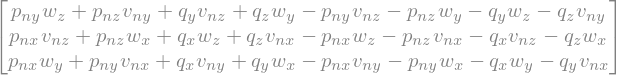

In [125]:
expanded_cross_product_n = cross_product_n.expand()
expanded_cross_product_n.T

the non-linearity is given by the $q_x w_y$ and similar terms, which are independent of the hailstone chosen. So if we repeat this with another hailstone, $\mathbf{h}_m$,

\begin{align}
p_{mx} w_y - p_{mx} v_{my} - q_x w_y + q_x v_{my} - p_{my} w_x +p_{my} v_{mx} + q_y w_x -q_y v_{mx} = 0 \\
\cdots
\end{align}


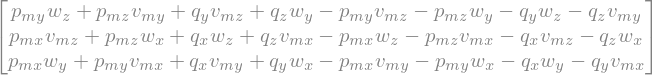

In [126]:
p_mx, p_my, p_mz = symbols("p_mx p_my p_mz")
p_m = Matrix(1, 3, [p_mx, p_my, p_mz])

v_mx, v_my, v_mz = symbols("v_mx v_my v_mz")
v_m = Matrix(1, 3, [v_mx, v_my, v_mz])
expanded_cross_product_m = (p_m - q).cross(w - v_m).expand()
expanded_cross_product_m.T


And then subtract this from the first equation in the previous system:

\begin{align}
p_{nx} w_y - p_{mx} w_y - p_{nx} v_{ny} + p_{mx} v_{my} + q_x v_{ny} - q_x v_{my} - p_{ny} w_x + p_{my} w_x +p_{ny} v_{nx} - p_{my} v_{mx} - q_y v_{nx} + q_y v_{mx} = 0 \\
\cdots
\end{align}


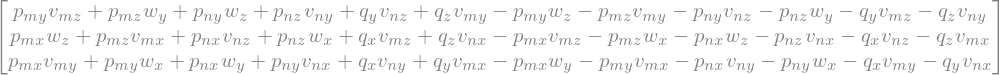

In [127]:
system_nm = expanded_cross_product_n - expanded_cross_product_m
system_nm.T


The non linear terms are eliminated. Grouping like terms, and moving the constant terms to the right hand side:


\begin{align}
q_y (v_{nz} - v_{mz}) - q_z (v_{ny} - v_{my}) - w_y (p_{nz} - p_{mz}) + w_z (p_{ny} - p_{my}) = p_{ny} v_{nz} - p_{my} v_{mz} - p_{nz} v_{ny} + p_{mz} v_{my} \\
q_x (v_{nz} - v_{mz}) - q_z (v_{nx} - v_{mx}) - w_x (p_{nz} - p_{mz}) + w_z (p_{nx} - p_{mx}) = p_{nx} v_{nz} - p_{mx} v_{mz} - p_{nz} v_{nx} + p_{mz} v_{mx} \\
q_x (v_{ny} - v_{my}) - q_y (v_{nx} - v_{mx}) - w_x (p_{ny} - p_{my}) + w_y (p_{nx} - p_{mx}) = p_{nx} v_{ny} - p_{mx} v_{my} - p_{ny} v_{nx} + p_{my} v_{mx} \\
\end{align}


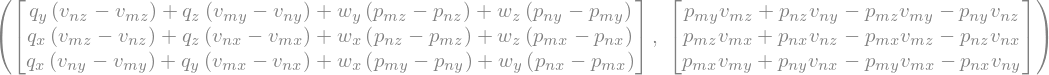

In [128]:
constant_vector_nm = system_nm.subs({ q_x: 0, q_y: 0, q_z: 0, w_x: 0, w_y: 0, w_z: 0} )
unknown_matrix_nm = system_nm.applyfunc(lambda x: x.collect(q_x).collect(q_y).collect(q_z).collect(w_x).collect(w_y).collect(w_z)) - constant_vector_nm
unknown_matrix_nm.T, constant_vector_nm.T




We now have three linear equations in six unknowns. Introduce a third hailstone $\mathbf{h}_l$ gets us a further 3 equations:

\begin{align}
q_y (v_{nz} - v_{lz}) - q_z (v_{ny} - v_{ly}) - w_y (p_{nz} - p_{lz}) + w_z (p_{ny} - p_{ly}) = p_{ny} v_{nz} - p_{ly} v_{lz} - p_{nz} v_{ny} + p_{lz} v_{ly} \\
q_x (v_{nz} - v_{lz}) - q_z (v_{nx} - v_{lx}) - w_x (p_{nz} - p_{lz}) + w_z (p_{nx} - p_{lx}) = p_{nx} v_{nz} - p_{lx} v_{lz} - p_{nz} v_{nx} + p_{lz} v_{lx} \\
q_x (v_{ny} - v_{ly}) - q_y (v_{nx} - v_{lx}) - w_x (p_{ny} - p_{ly}) + w_y (p_{nx} - p_{lx}) = p_{nx} v_{ny} - p_{lx} v_{ly} - p_{ny} v_{nx} + p_{ly} v_{lx} \\
\end{align}



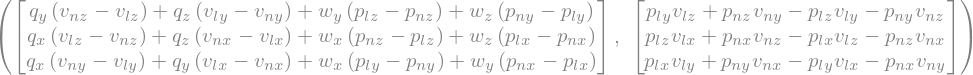

In [129]:
p_lx, p_ly, p_lz = symbols("p_lx p_ly p_lz")
p_l = Matrix(1, 3, [p_lx, p_ly, p_lz])

v_lx, v_ly, v_lz = symbols("v_lx v_ly v_lz")
v_l = Matrix(1, 3, [v_lx, v_ly, v_lz])
expanded_cross_product_l = (p_l - q).cross(w - v_l).expand()

system_nl = expanded_cross_product_n - expanded_cross_product_l
system_nl.T

constant_vector_nl = system_nl.subs({ q_x: 0, q_y: 0, q_z: 0, w_x: 0, w_y: 0, w_z: 0} )
unknown_matrix_nl = system_nl.applyfunc(lambda x: x.collect(q_x).collect(q_y).collect(q_z).collect(w_x).collect(w_y).collect(w_z)) - constant_vector_nl
unknown_matrix_nl.T, constant_vector_nl.T

Combining these two systems and re-writing in matrix form gives:

\begin{equation}
\begin{pmatrix}
       0        &   v_{nz} - v_{mz} & - v_{ny} + v_{my} &          0        & - p_{nz} + p_{mz} & p_{ny} - p_{my} \\
v_{nz} - v_{mz} &          0        & - v_{nx} + v_{mx} & - p_{nz} + p_{mz} &          0        & p_{nx} - p_{mx} \\
v_{ny} - v_{my} & - v_{nx} + v_{mx} &          0        & - p_{ny} + p_{my} &   p_{nx} - p_{mx} &        0        \\
       0        &   v_{nz} - v_{lz} & - v_{ny} + v_{ly} &          0        & - p_{nz} + p_{lz} & p_{ny} - p_{ly} \\
v_{nz} - v_{lz} &          0        & - v_{nx} + v_{lx} & - p_{nz} + p_{lz} &          0        & p_{nx} - p_{lx} \\
v_{ny} - v_{ly} & - v_{nx} + v_{lx} &           0       & - p_{ny} + p_{ly} &   p_{nx} - p_{lx} &        0        \\
\end{pmatrix}

\begin{pmatrix}
q_x \\
q_y \\
q_z \\
w_x \\
w_y \\
w_z 
\end{pmatrix}
=
\begin{pmatrix}
 p_{ny} v_{nz} - p_{my} v_{mz} - p_{nz} v_{ny} + p_{mz} v_{my} \\
 p_{nx} v_{nz} - p_{mx} v_{mz} - p_{nz} v_{nx} + p_{mz} v_{mx} \\
 p_{nx} v_{ny} - p_{mx} v_{my} - p_{ny} v_{nx} + p_{my} v_{mx} \\
 p_{ny} v_{nz} - p_{ly} v_{lz} - p_{nz} v_{ny} + p_{lz} v_{ly} \\
 p_{nx} v_{nz} - p_{lx} v_{lz} - p_{nz} v_{nx} + p_{lz} v_{lx} \\
 p_{nx} v_{ny} - p_{lx} v_{ly} - p_{ny} v_{nx} + p_{ly} v_{lx} \\
\end{pmatrix}

\end{equation}

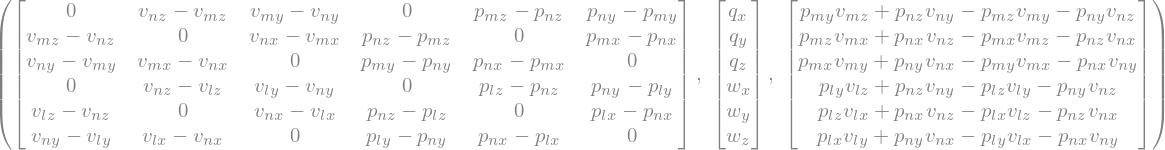

In [130]:
unknown_vector = Matrix.hstack(unknown_matrix_nm, unknown_matrix_nl)
constant_vector = Matrix.hstack(constant_vector_nm, constant_vector_nl)

c1, c2, c3, c4, c5, c6 = symbols("c1 c2 c3 c4 c5 c6", cls=Wild)
v = Matrix(1, 6, [c1, c2, c3, c4, c5, c6])
coefficient_matrix = Matrix([ v.subs(i.match(c1*q_x + c2*q_y + c3*q_z + c4*w_x + c5*w_y + c6*w_z)) for i in unknown_vector ])
unknown_vector = Matrix(6,1, [q_x, q_y, q_z, w_x, w_y, w_z])
coefficient_matrix, unknown_vector, constant_vector.T